# 8-step tutorial of *primitiv*: solving the XOR problem #

## 1. Imports modules. ##

In [1]:
from primitiv import *
from primitiv import operators as F
from graphviz import Source

## 2. Sets the default device and the default computation graph. ##

In [2]:
dev = devices.Naive(); Device.set_default(dev)
# if you want to activate CUDA backend, just replacing above to:
#def = devices.CUDA(gpuid); Device.set_default(dev)
g = Graph(); Graph.set_default(g)

## 3. Initializes parameters. ##

In [3]:
w1 = Parameter([8, 2], initializers.XavierUniform())
b1 = Parameter([8], initializers.Constant(0))
w2 = Parameter([1, 8], initializers.XavierUniform())
b2 = Parameter([1], initializers.Constant(0))

## 4. Initializes the trainer. ##

In [4]:
trainer = trainers.SGD()
trainer.add_parameter(w1)
trainer.add_parameter(b1)
trainer.add_parameter(w2)
trainer.add_parameter(b2)

## 5. Prepares input/output samples. ##

In [5]:
inputs = [
     1,  1,  # 1st sample
     1, -1,  # 2nd sample
    -1,  1,  # 3rd sample
    -1, -1,  # 4th sample
]
labels = [1, -1, -1, 1]

## 6. Defines the graph structure (as the function). ##

In [6]:
def build_graph():
    x = F.input(inputs, shape=Shape([2], 4))  # input
    h = F.tanh(F.parameter(w1) @ x + F.parameter(b1))
    y = F.tanh(F.parameter(w2) @ h + F.parameter(b2))  # output: 2-layer perceptron
    t = F.input(labels, shape=Shape([1], 4))  # ground-truth
    diff = y - t
    loss = F.batch.sum(diff * diff)  # loss: squared error
    return y, loss

## 7. Dumps the graph structure. ##

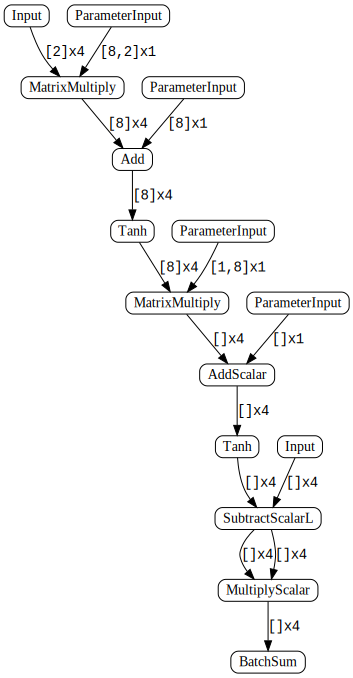

In [7]:
g.clear()
build_graph()
Source(g.dump("dot"))

## 8. Performs the training loop. ##

In [8]:
for i in range(20):
    # Constructs the graph.
    g.clear()
    y, loss = build_graph()
    
    # Calculates values
    y_vals = y.to_list()
    loss_val = loss.to_float()
    print("y =", "[" + ", ".join("%+.8f" % x for x in y_vals) + "]", ", loss =", "%.8f" % loss_val)
    
    # Train
    trainer.reset_gradients()
    loss.backward()
    trainer.update()

y = [-0.10508239, -0.07037310, +0.07037310, +0.10508239] , loss = 4.03198910
y = [+0.01696972, -0.06205702, -0.11091196, -0.05460506] , loss = 3.74875474
y = [+0.02570647, -0.08185500, -0.07070950, +0.09153999] , loss = 3.48111868
y = [+0.05422605, -0.12859556, -0.15797791, +0.10743118] , loss = 3.15951443
y = [+0.12970577, -0.16464621, -0.16956480, +0.21390682] , loss = 2.76279306
y = [+0.18291169, -0.25425616, -0.27294010, +0.25830859] , loss = 2.30248952
y = [+0.30440816, -0.30431265, -0.30813622, +0.38136128] , loss = 1.82921827
y = [+0.34708053, -0.43303367, -0.43833753, +0.41817600] , loss = 1.40173852
y = [+0.49337763, -0.45146406, -0.45766214, +0.54245234] , loss = 1.06103826
y = [+0.48871279, -0.58575326, -0.58046287, +0.55496997] , loss = 0.80707812
y = [+0.61656547, -0.57825071, -0.58451766, +0.64502227] , loss = 0.62352926
y = [+0.61299014, -0.66516680, -0.66063499, +0.66065073] , loss = 0.49221644
y = [+0.67469382, -0.67882228, -0.67954659, +0.70441109] , loss = 0.39904243